In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0])

<ipython-input-6-db9b1049037b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df2 = df.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[df2]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

print(f"Number of duplicate rows: {len(duplicate_rows)}")


Duplicate Rows:
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
47          1       3  female  28.0      0      0   7.7500        Q
55          1       1    male  28.0      0      0  35.5000        S
76          0       3    male  28.0      0      0   7.8958        S
77          0       3    male  28.0      0      0   8.0500        S
87          0       3    male  28.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
870         0       3    male  26.0      0      0   7.8958        S
877         0       3    male  19.0      0      0   7.8958        S
878         0       3    male  28.0      0      0   7.8958        S
884         0       3    male  25.0      0      0   7.0500        S
886         0       2    male  27.0      0      0  13.0000        S

[116 rows x 8 columns]
Number of duplicate rows: 116


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Text(0.5, 1.0, 'Count of Survived')

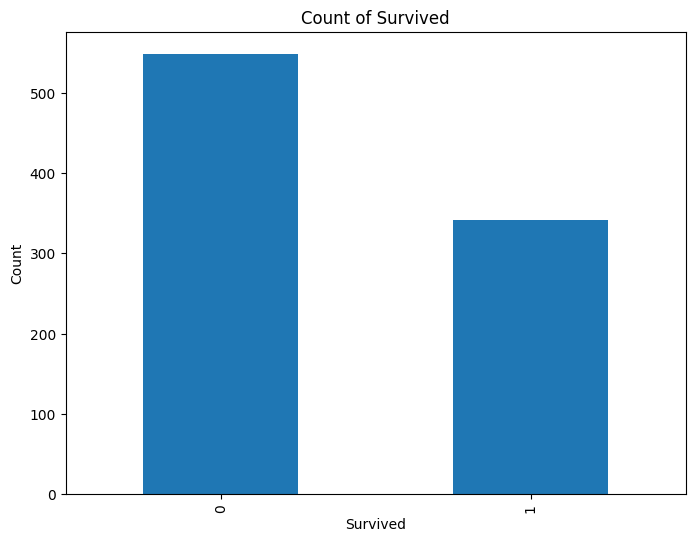

In [ ]:
# Survived show in bar chart
import matplotlib.pyplot as plt

# Count the occurrences of each Survived
Survived_counts = df['Survived'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
Survived_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survived')


Survived
0    549
1    342
Name: count, dtype: int64


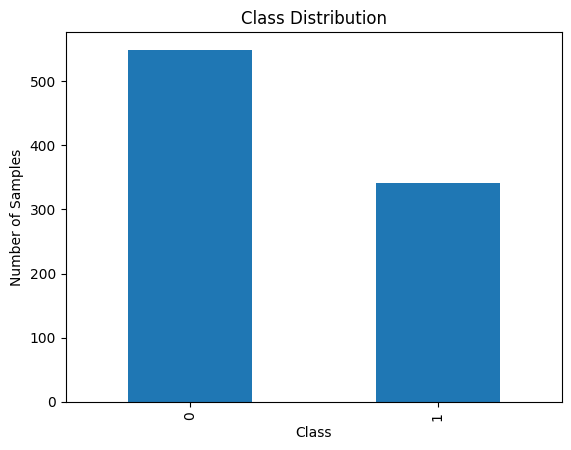

Imbalance Ratio: 1.61


In [ ]:
# Check the distribution of the target variable
class_distribution = df['Survived'].value_counts()
print(class_distribution)

# Plot the class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

# Calculate the imbalance ratio
imbalance_ratio = class_distribution[0] / class_distribution[1]
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Encode categorical columns (Sex, Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())


Class distribution after SMOTE:
Survived
0    444
1    444
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7877094972067039
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
# Print the predicted class labels
print("Predicted Class Labels:")
print(y_pred)

Predicted Class Labels:
[0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'survive_model.pkl')

# Load the model (later)
# model = joblib.load('survive_model.pkl')

['survive_model.pkl']

In [ ]:
import joblib

# Load the trained model
model = joblib.load('survive_model.pkl')

In [ ]:
# Example: Testing the model on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7877094972067039
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
import pandas as pd

# Get the feature names from the training data
feature_names = X.columns

# Create the new passenger data
new_passenger = {
    'Pclass': 3,
    'Age': 49,
    'SibSp': 0,
    'Parch': 0,
    'Fare': 7.25,
    'Sex_male': 0,
    'Sex_female': 1,
    'Embarked_Q': 0,
    'Embarked_S': 1,
    'Embarked_C': 0
}

# Convert to DataFrame
new_data = pd.DataFrame([new_passenger])

# Reorder columns to match training data
new_data = new_data[feature_names]


In [ ]:
prediction = model.predict(new_data)

# Interpret the prediction
print("Survived" if prediction[0] == 1 else "Did not survive")


Did not survive
